Classification of Drug

In [ ]:
# importing the required lib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Task 1: Read the dataset and do data pre-processing

In [ ]:
# Reading the dataset
df = pd.read_csv('/content/drug200.csv')  
# Visualizing the data
df.head()  

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
# Checking for null values

df.isnull().sum()


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
# Getting Statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
#categories
df['Drug'].unique()  

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
#category count
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<Axes: ylabel='Drug'>

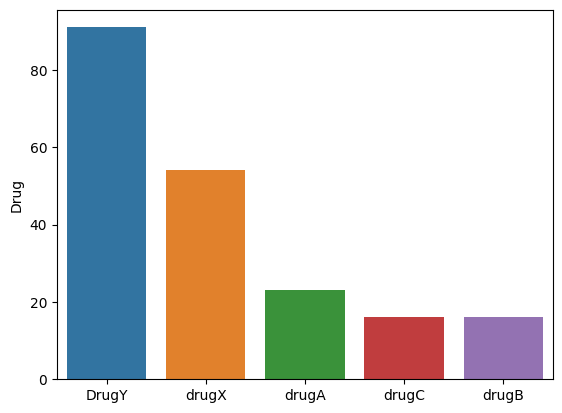

In [ ]:
#Barplot
sns.barplot(x=df.Drug.value_counts().index,y=df.Drug.value_counts())

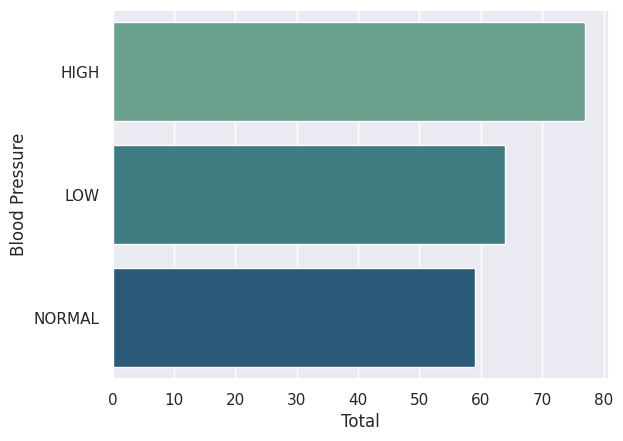

In [ ]:
#blood pressure
sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=df, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

OUTLIERS CHECKING

<Axes: >

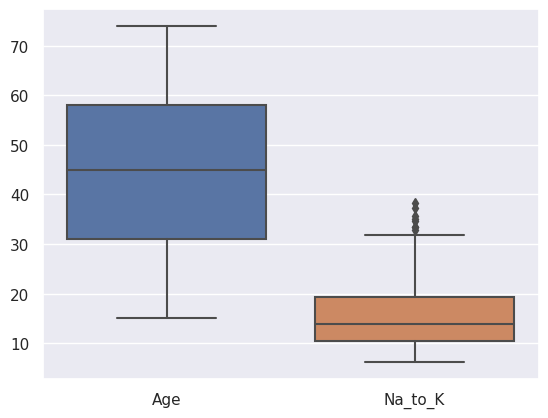

In [ ]:
sns.boxplot(df) 

<Axes: >

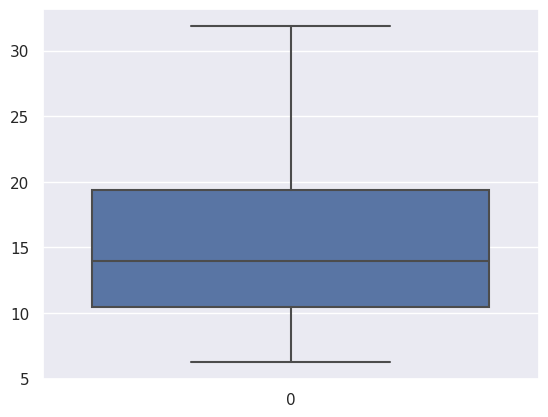

In [ ]:
#iqr method for removing outliers

q1=df.Na_to_K.quantile(.25)
q3=df.Na_to_K.quantile(.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
upper_limit
df['Na_to_K']=np.where(df['Na_to_K']>upper_limit, 30, df['Na_to_K'])
sns.boxplot(df.Na_to_K)

In [ ]:
# Splitting the dependent and independent columns

x=df.drop(columns = ['Drug'],axis=1)
y=df['Drug']

In [ ]:
#converting data from categorical to numerical 

from sklearn.preprocessing import LabelEncoder

x=pd.get_dummies(x,columns=['Sex','BP','Cholesterol'],drop_first = True)

le=LabelEncoder()
y=le.fit_transform(y)

In [ ]:
#splitting the training and testing datasets

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.3, random_state=21)

In [ ]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((140, 6), (60, 6), (140,), (60,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [ ]:
from tensorflow import keras

ytrain=keras.utils.to_categorical(ytrain)
ytest=keras.utils.to_categorical(ytest)

Task 2: Build the ANN model with (input layer,min 3 hidden layers & output layer)

Testing and Training model

In [ ]:
yclass=len(np.unique(y))
print(yclass)

5


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ANN Model

model = Sequential()
model.add(Dense(48, input_dim=6, activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
output_layer = Dense(yclass,activation='softmax')
model.add(output_layer)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                336       
                                                                 
 dense_1 (Dense)             (None, 36)                1764      
                                                                 
 dense_2 (Dense)             (None, 24)                888       
                                                                 
 dense_3 (Dense)             (None, 12)                300       
                                                                 
 dense_4 (Dense)             (None, 5)                 65        
                                                                 
Total params: 3,353
Trainable params: 3,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(xtrain,ytrain,epochs=20,batch_size=5)

Epoch 1/20
28/28 [==============================] - 1s 3ms/step - loss: 1.5527 - accuracy: 0.3286
Epoch 2/20
28/28 [==============================] - 0s 2ms/step - loss: 1.3875 - accuracy: 0.5857
Epoch 3/20
28/28 [==============================] - 0s 2ms/step - loss: 1.1555 - accuracy: 0.6786
Epoch 4/20
28/28 [==============================] - 0s 2ms/step - loss: 0.8566 - accuracy: 0.7214
Epoch 5/20
28/28 [==============================] - 0s 2ms/step - loss: 0.6009 - accuracy: 0.8214
Epoch 6/20
28/28 [==============================] - 0s 2ms/step - loss: 0.3945 - accuracy: 0.9000
Epoch 7/20
28/28 [==============================] - 0s 2ms/step - loss: 0.2622 - accuracy: 0.9643
Epoch 8/20
28/28 [==============================] - 0s 2ms/step - loss: 0.1813 - accuracy: 0.9786
Epoch 9/20
28/28 [==============================] - 0s 2ms/step - loss: 0.1304 - accuracy: 0.9714
Epoch 10/20
28/28 [==============================] - 0s 2ms/step - loss: 0.0934 - accuracy: 1.0000
Epoch 11/20
28/28 [

Task 3 : Test the model with random data

In [ ]:
test_loss, test_acc = model.evaluate(xtest, ytest)
print('Test accuracy:', test_acc * 100)

2/2 [==============================] - 0s 7ms/step - loss: 0.2977 - accuracy: 0.9167
Test accuracy: 91.66666865348816
